In [1]:
import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
expfolder = paths.results / "server_sample_derivatives" / "SPAMS_DictLr_Ncomps-4_alpha-950_PosCode-False_PosAtoms-True_Constr-l2Atoms-optimL0Codes_nIters-2_nInits-4_t-15_Act-pos_n-34"
components = np.load(expfolder / paths.dictcomps_npy_name)
assignments = pd.read_pickle(expfolder / paths.comp_assignments_df_name).reset_index(level="frame_time")
display(components.shape)
assignments


(4, 23662)

block                     frame_time RetainedFrames   DictComp             \
                                               type          0          1   
subj_name       ses_name                                                    
sub-CC00120XX05 ses-41600          5           high   0.000000   5.175022   
                ses-41600          6           high   0.000000  11.346113   
                ses-41600          7           high   0.000000   7.992700   
                ses-41600          8           high   1.441657   7.300028   
                ses-41600          9           high  -2.079585  16.782862   
...                              ...            ...        ...        ...   
sub-CC00177XX13 ses-58500       2263           high   0.000000   0.000000   
                ses-58500       2272           high   0.000000   0.000000   
                ses-58500       2275           high   0.000000   0.000000   
                ses-58500       2287           high  10.495916   0.000000   
                ses-58500       2288           high   0.000000   0.000000   

block                                          
                                  2         3  
subj_name       ses_name                       
sub-CC00120XX05 ses-41600  0.000000  0.000000  
                ses-41600  0.000000  0.000000  
                ses-41600 -3.940220  0.000000  
                ses-41600 -4.486219 -1.823081  
                ses-41600 -4.842331  4.045978  
...                             ...       ...  
sub-CC00177XX13 ses-58500  0.000000  0.000000  
                ses-58500  0.000000  0.000000  
                ses-58500  0.000000  0.000000  
                ses-58500  0.000000  0.000000  
                ses-58500  0.000000  0.000000  

[11662 rows x 6 columns]

In [110]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos['subj_name'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
subjs_infos['ses_name'] = subjs_infos['session_id'].apply(lambda x: f"ses-{x}")
subjs_infos = subjs_infos.set_index(["subj_name", "ses_name"]).drop(columns=['participant_id', 'session_id'])
subjs_infos.columns = pd.MultiIndex.from_product([['metadata'], subjs_infos.columns])


assignments_metadata_df = assignments.join(subjs_infos, how='left')
assignments_metadata_df

frame_time RetainedFrames   DictComp             \
                                               type          0          1   
subj_name       ses_name                                                    
sub-CC00120XX05 ses-41600          5           high   0.000000   5.175022   
                ses-41600          6           high   0.000000  11.346113   
                ses-41600          7           high   0.000000   7.992700   
                ses-41600          8           high   1.441657   7.300028   
                ses-41600          9           high  -2.079585  16.782862   
...                              ...            ...        ...        ...   
sub-CC00177XX13 ses-58500       2263           high   0.000000   0.000000   
                ses-58500       2272           high   0.000000   0.000000   
                ses-58500       2275           high   0.000000   0.000000   
                ses-58500       2287           high  10.495916   0.000000   
                ses-58500       2288           high   0.000000   0.000000   

                                                 metadata                     \
                                  2         3 scan_number singleton sedation   
subj_name       ses_name                                                       
sub-CC00120XX05 ses-41600  0.000000  0.000000           1         S    False   
                ses-41600  0.000000  0.000000           1         S    False   
                ses-41600 -3.940220  0.000000           1         S    False   
                ses-41600 -4.486219 -1.823081           1         S    False   
                ses-41600 -4.842331  4.045978           1         S    False   
...                             ...       ...         ...       ...      ...   
sub-CC00177XX13 ses-58500  0.000000  0.000000           1         S    False   
                ses-58500  0.000000  0.000000           1         S    False   
                ses-58500  0.000000  0.000000           1         S    False   
                ses-58500  0.000000  0.000000           1         S    False   
                ses-58500  0.000000  0.000000           1         S    False   

                                      ...                        \
                           birth_age  ... qc_fmri_fieldmap_type   
subj_name       ses_name              ...                         
sub-CC00120XX05 ses-41600  39.857143  ...         spin_echo_epi   
                ses-41600  39.857143  ...         spin_echo_epi   
                ses-41600  39.857143  ...         spin_echo_epi   
                ses-41600  39.857143  ...         spin_echo_epi   
                ses-41600  39.857143  ...         spin_echo_epi   
...                              ...  ...                   ...   
sub-CC00177XX13 ses-58500  33.285714  ...         spin_echo_epi   
                ses-58500  33.285714  ...         spin_echo_epi   
                ses-58500  33.285714  ...         spin_echo_epi   
                ses-58500  33.285714  ...         spin_echo_epi   
                ses-58500  33.285714  ...         spin_echo_epi   

                                                                               \
                          qc_fmri_dvars_z qc_fmri_tsnr_z qc_fmri_mcdc2sbref_z   
subj_name       ses_name                                                        
sub-CC00120XX05 ses-41600        0.452339       1.200596             0.975372   
                ses-41600        0.452339       1.200596             0.975372   
                ses-41600        0.452339       1.200596             0.975372   
                ses-41600        0.452339       1.200596             0.975372   
                ses-41600        0.452339       1.200596             0.975372   
...                                   ...            ...                  ...   
sub-CC00177XX13 ses-58500        2.317030       3.211136             0.001692   
                ses-58500        2.317030       3.211136             0.001692

In [111]:
assignments_metadata_df["DictComp"].describe()

,0,1,2,3
count,11662.000000,11662.000000,11662.000000,11662.000000
mean,3.425141,0.959858,0.360235,-0.912287
std,7.657472,5.079895,4.842935,5.729100
min,-26.559588,-23.966869,-37.668073,-46.607509
25%,0.000000,0.000000,0.000000,-2.332120
50%,0.000000,0.000000,0.000000,0.000000
75%,8.046258,2.416690,1.118535,0.000000
max,47.017000,32.183670,36.896786,27.148620


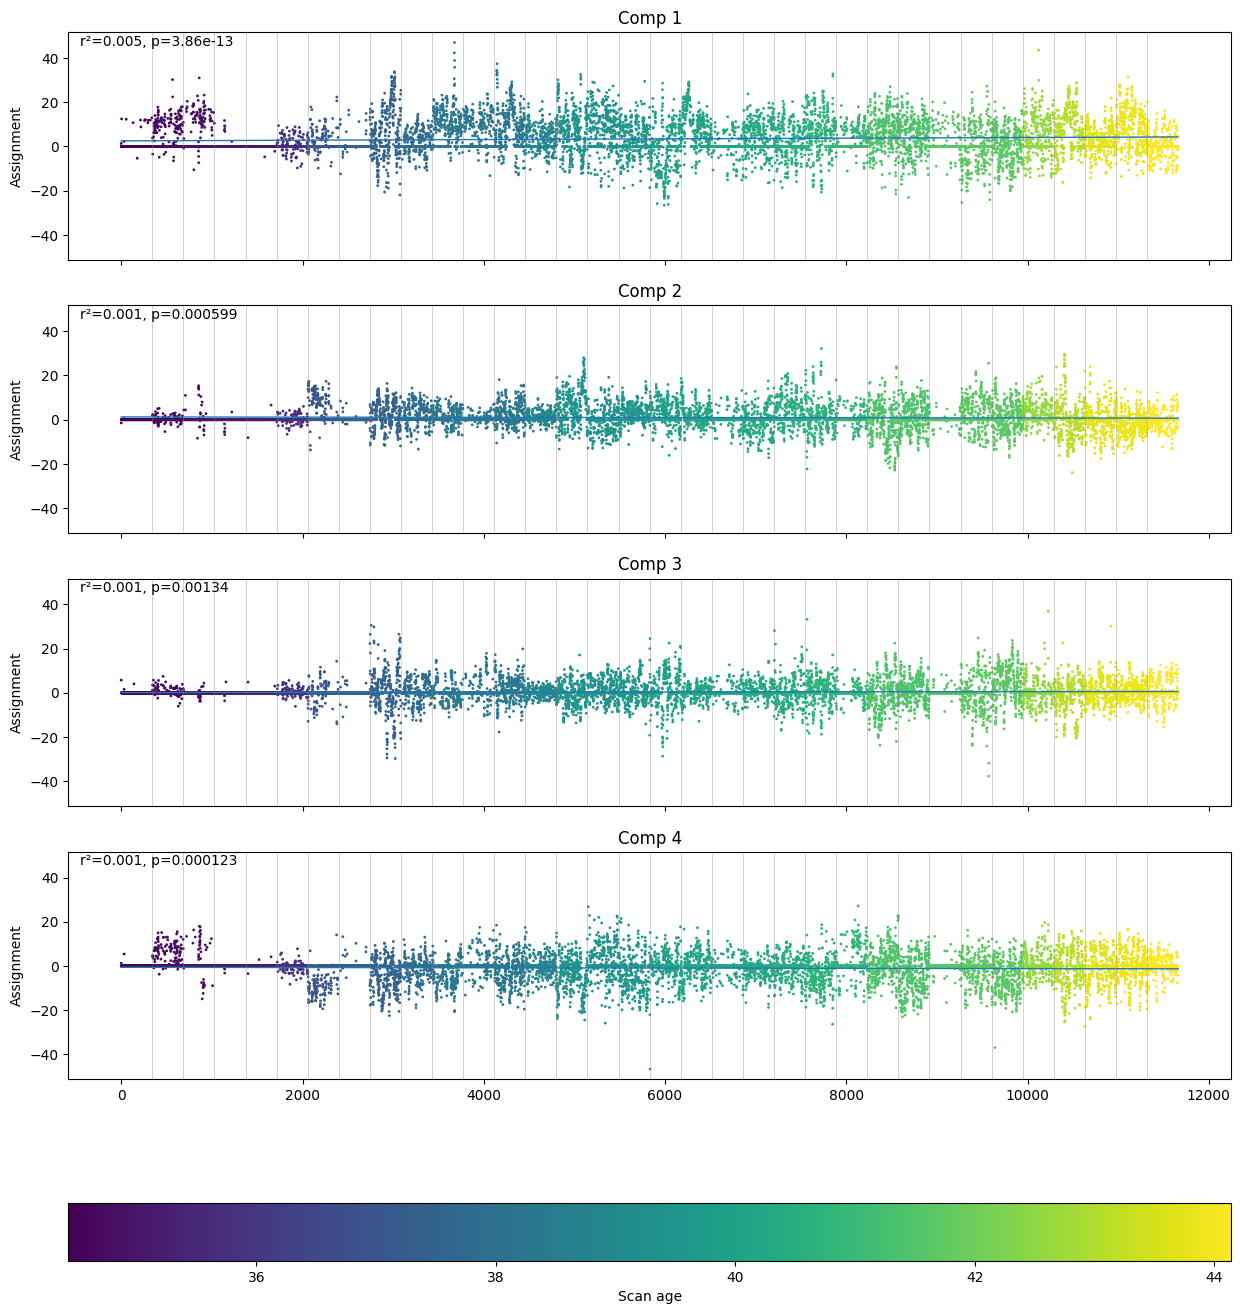

In [113]:
from scipy.stats import linregress

n_comps = components.shape[0]

fig, axes = plt.subplots(n_comps, 1, figsize=(15, 4 * n_comps), sharex=True, sharey=True)

age_sorted_assignments = assignments_metadata_df.sort_values(('metadata', 'scan_age'))

age_sorted_assignments = assignments_metadata_df.sort_values(by=[
    ('metadata', 'scan_age'),
    'subj_name',
    'frame_time'
])


codes = age_sorted_assignments["metadata", "scan_age"].values
subjects = age_sorted_assignments.index.get_level_values("subj_name")
change_points = np.where(subjects[:-1] != subjects[1:])[0] + 0.5



x = np.arange(len(codes))

for ax, comp in zip(axes, age_sorted_assignments["DictComp"].columns):
    y = age_sorted_assignments["DictComp"][comp].values




    sc = ax.scatter(x, y, c=codes, s=1)
    # sc = ax.plot(x, y )#c=codes, s=1)
    ax.set_ylabel("Assignment")
    ax.set_title(f"Comp {comp+1}")

    slope, intercept, r, p, stderr = linregress(x, y)
    r2 = r ** 2
    ax.plot(x, slope*x + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")


    for cp in change_points:
        ax.axvline(cp, color="gray", linewidth=0.5, alpha=0.5)


cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), orientation="horizontal", fraction=0.05, pad=0.1)
cbar.set_label("Scan age")
plt.show()


<Axes: >

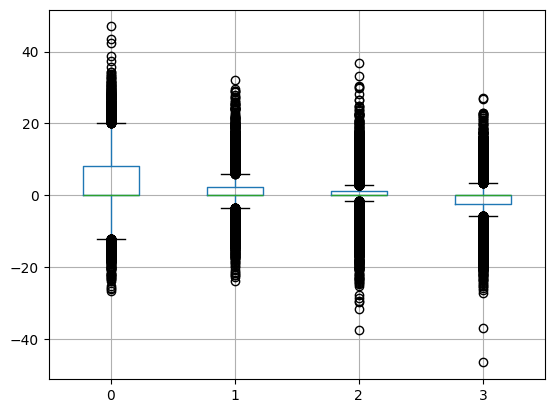

In [114]:
age_sorted_assignments["DictComp"].boxplot(showfliers=True)

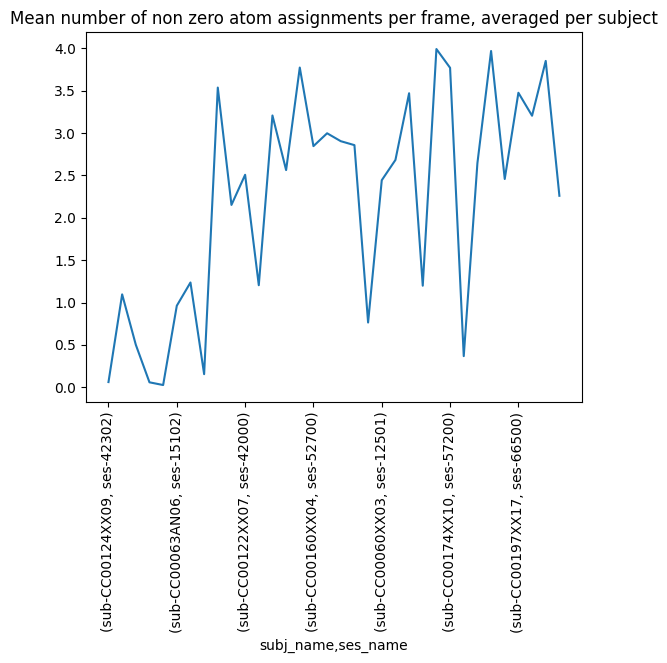

In [126]:
# plt.figure(figsize=(35,8))
(age_sorted_assignments["DictComp"].abs() > 1e-2).sum(axis=1).groupby(level=["subj_name", "ses_name"], sort=False).agg('mean').plot(rot=90)
plt.title("Mean number of non zero atom assignments per frame, averaged per subject")
plt.show()

<Axes: xlabel='subj_name,ses_name'>

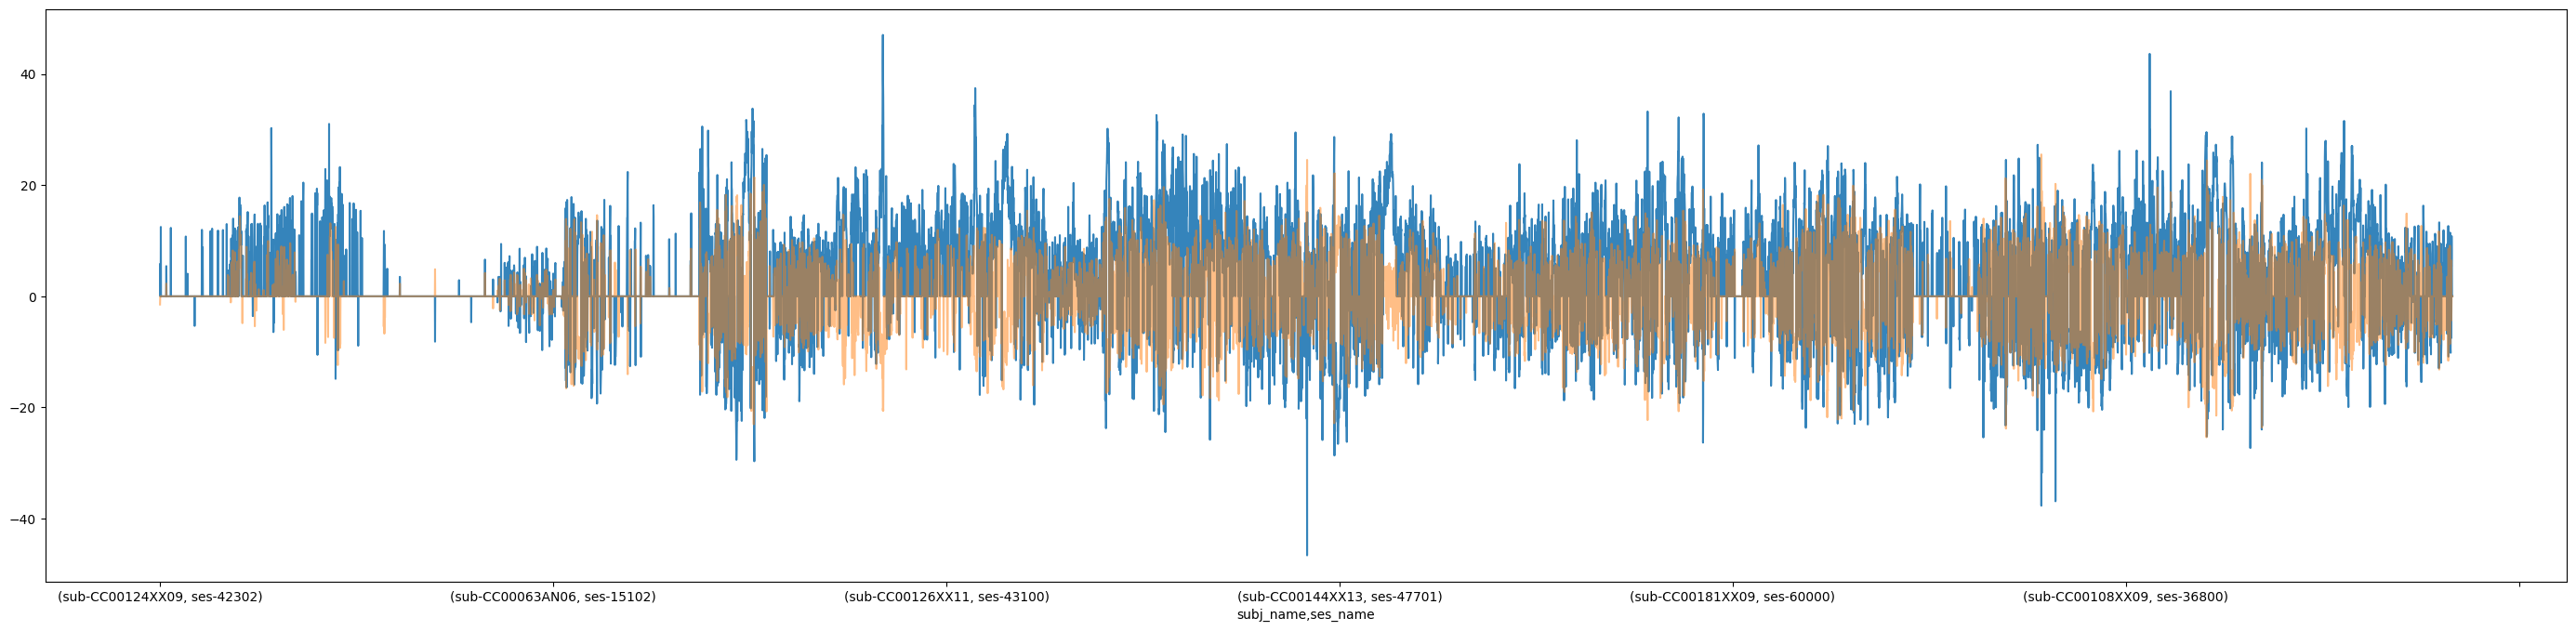

In [52]:
plt.figure(figsize=(35,8))
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[0]] , axis=1).plot(alpha=0.9)
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[1]] , axis=1).plot(alpha=0.5)

<Axes: xlabel='subj_name,ses_name'>

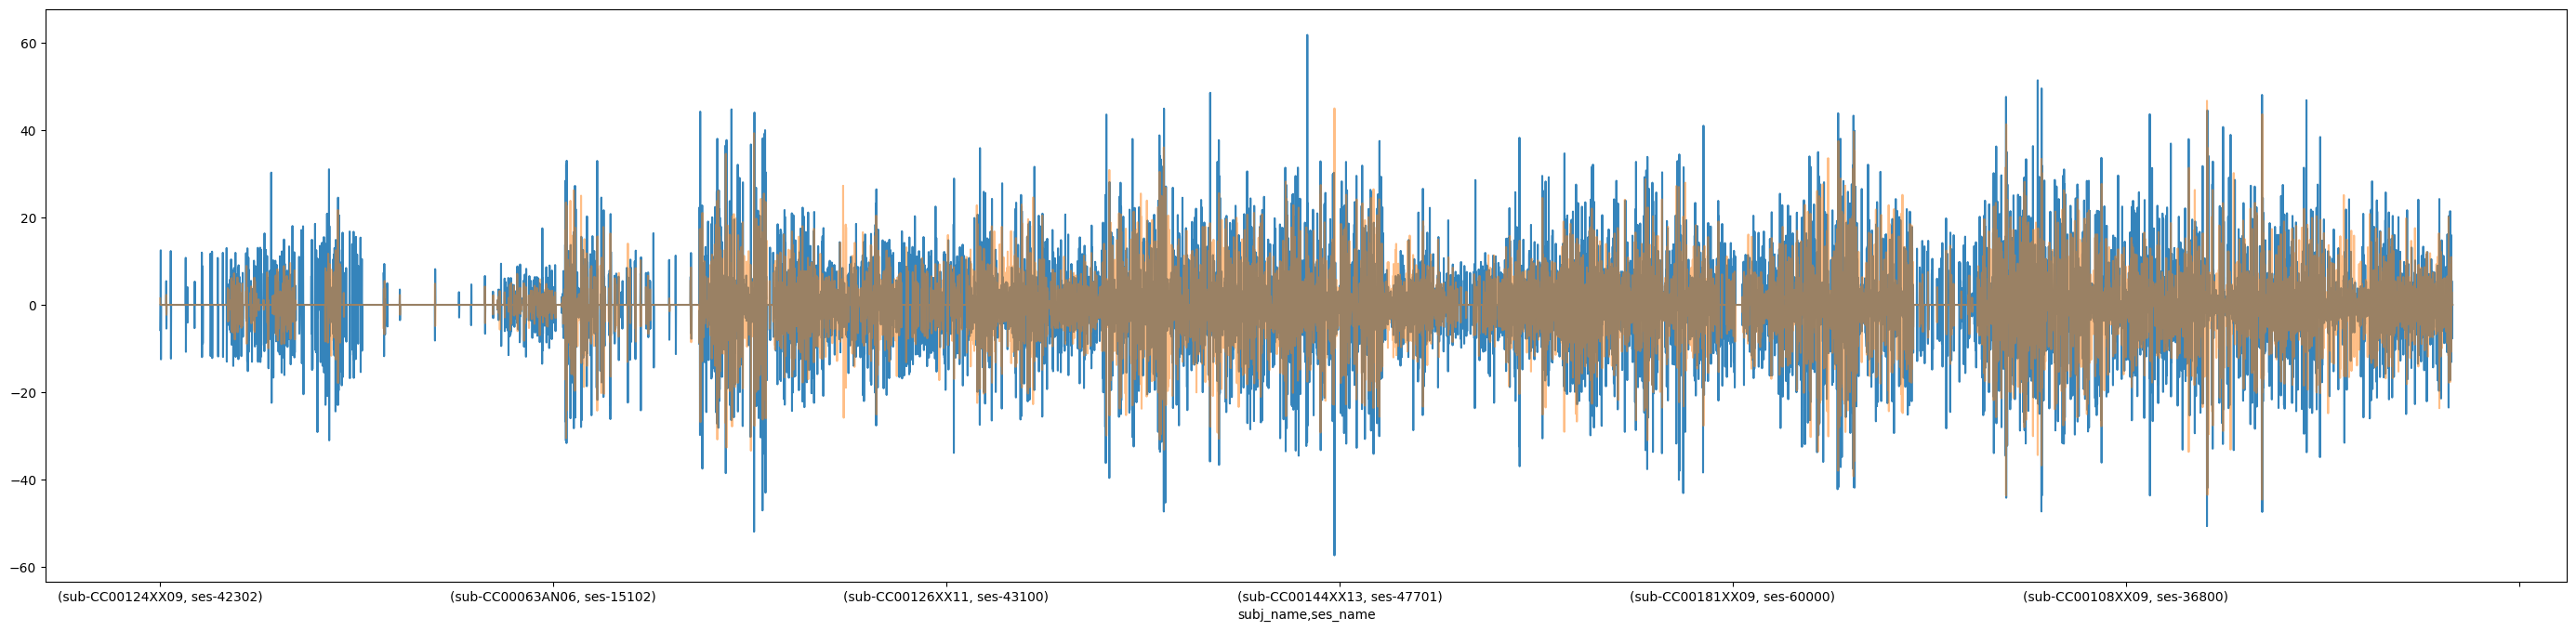

In [53]:
plt.figure(figsize=(35,8))
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[0]] , axis=1).diff().plot(alpha=0.9)
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[1]] , axis=1).diff().plot(alpha=0.5)

<Axes: xlabel='subj_name,ses_name'>

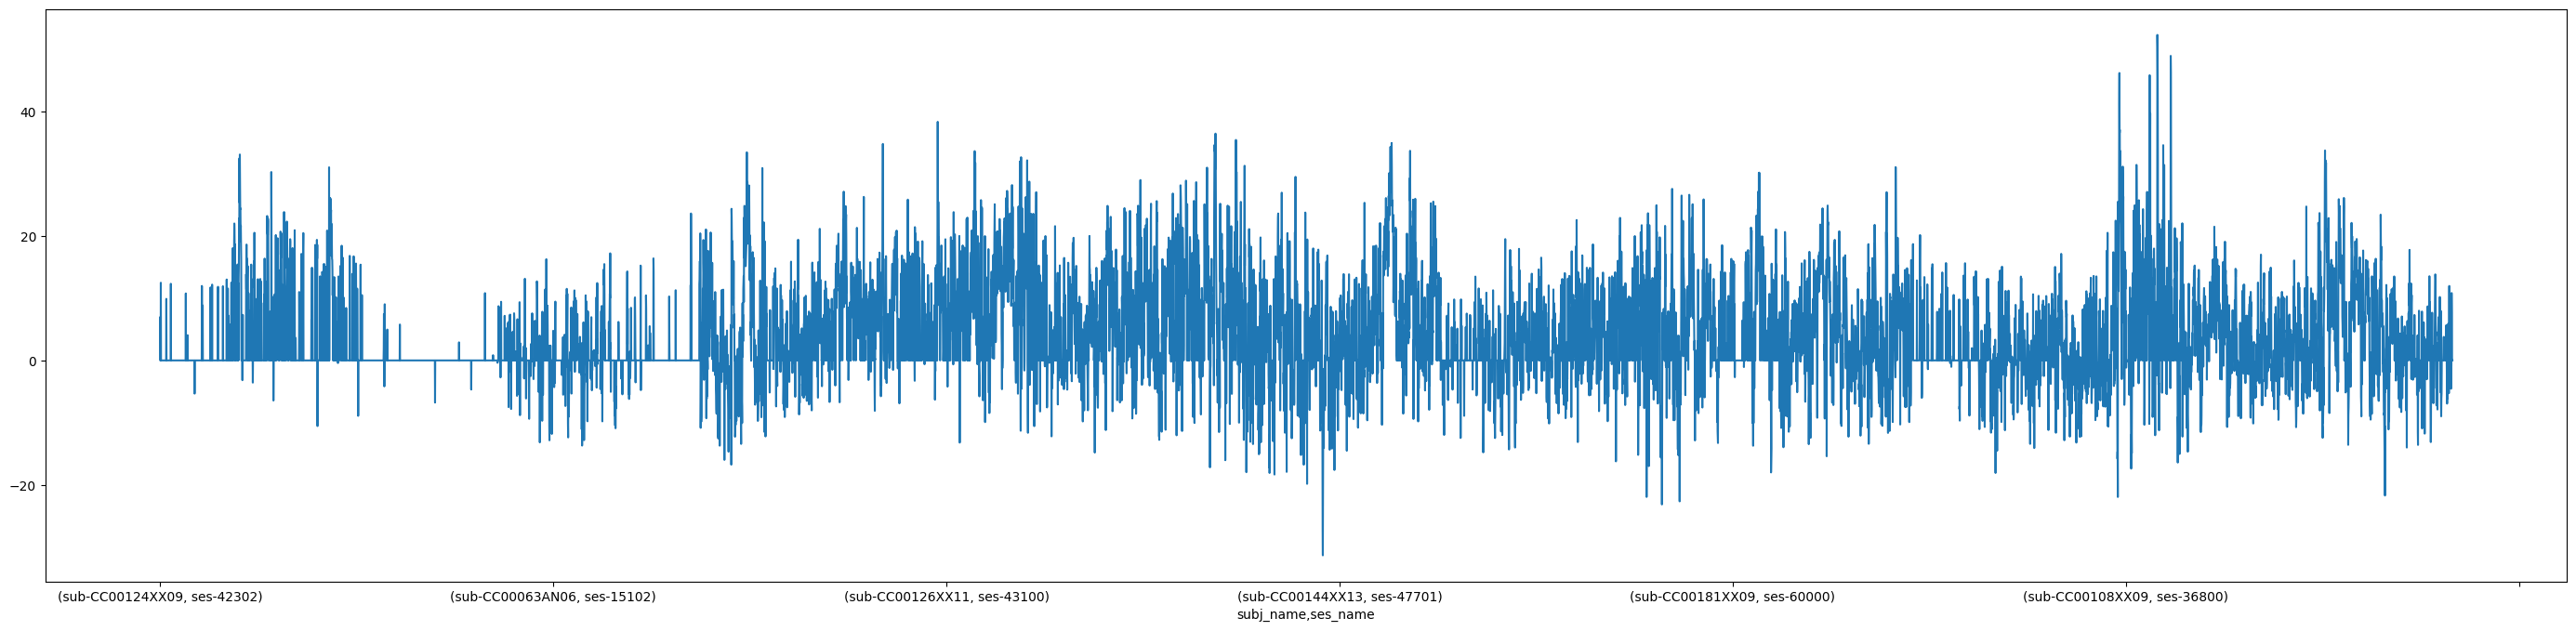

In [54]:
plt.figure(figsize=(35,8))
age_sorted_assignments["DictComp"].sum(axis=1).plot()

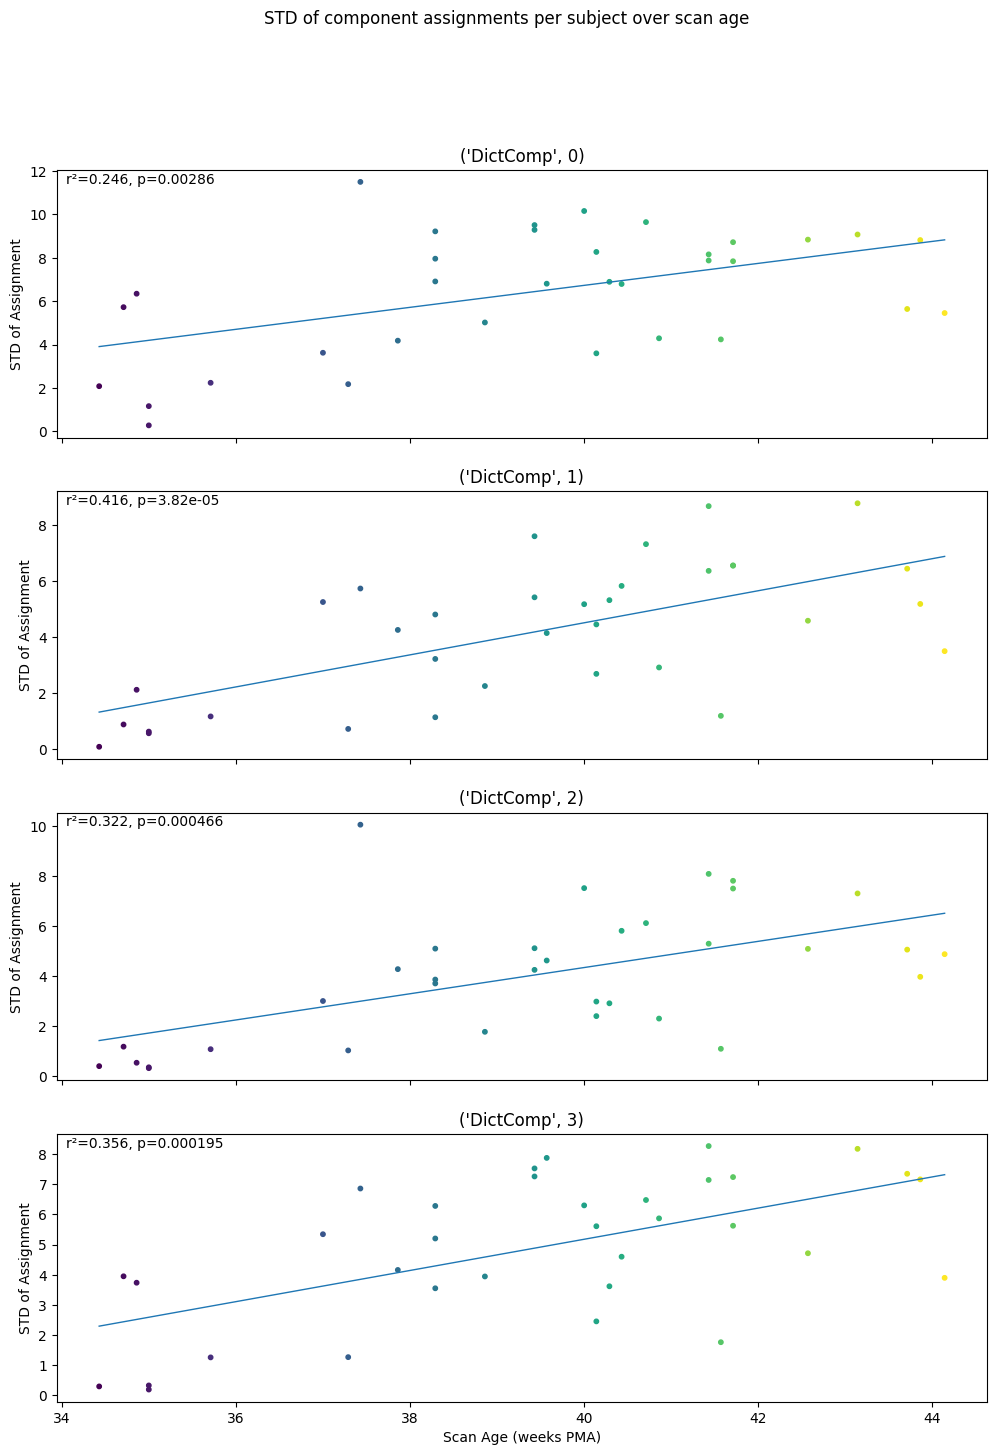

In [55]:
subjGrouped_ageSorted_assignments = age_sorted_assignments.groupby(
    level=['subj_name', 'ses_name'],
    sort=False
)["DictComp"]

fig, axes = plt.subplots(components.shape[0], 1, figsize=(12, 4 * components.shape[0]), sharex=True)
for ax,(comp_idx, comp_value) in zip(axes, subjGrouped_ageSorted_assignments.std().T.iterrows()):
    scan_ages = age_sorted_assignments["metadata", 'scan_age'].groupby(
        level=['subj_name', 'ses_name'],
        sort=False
    ).first().values
    ax.scatter(scan_ages, comp_value, s=10, c=scan_ages)


    slope, intercept, r, p, stderr = linregress(scan_ages, comp_value)
    r2 = r ** 2
    ax.plot(scan_ages, slope*scan_ages + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")

    ax.set_ylabel("STD of Assignment")
    ax.set_title(f"{comp_idx}")
fig.suptitle("STD of component assignments per subject over scan age")
plt.xlabel("Scan Age (weeks PMA)")
plt.show()